In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
smile = pd.read_csv('C:/Users/6106057/nss-data-analytics/projects/smile-on-the-dazzling-dentures/Data/smile.csv')

C:\Users\6106057\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
smile.columns

Index(['Unnamed: 0', 'CallReportNum', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'CallerNum',
       'PhoneWorkerNum', 'CityName', 'CountyName', 'StateProvince',
       'CountryName', 'PostalCode', 'Narrative', 'EnteredByWorkerNum',
       'EnteredOn',
       'SMILE ON 60+ Demographic Information - # of People in Household',
       'Birth Year', 'SMILE ON 60+ Demographic Information - Other Language',
       'SMILE ON 60+ Screening - Last Screening Date',
       'SMILE ON 60+ Verification of Eligibility - Verification Date',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Did the client commit to referral?',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Do you need help in these other areas?',
       'SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and 

In [4]:
smile = smile.rename(columns ={'CallReportNum':'reportID','ReportVersion':'reg_clic',
                               'CallDateAndTimeStart':'callStart','CallDateAndTimeEnd':'callEnd',
                              'CityName':'city', 'CountyName':'county','CountryName':'country',
                              'PostalCode':'zipcode',
                               'SMILE ON 60+ Demographic Information - # of People in Household': 'num_household',
                               'Birth Year':'birth_year',
                               'SMILE ON 60+ Demographic Information - Other Language': 'language',
                               'SMILE ON 60+ Verification of Eligibility - Verification Date':'lastscreeningdate',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Dental Clinic':'dental_clinic',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Did the client commit to referral?':'referral',
                               'SMILE ON 60+ Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?' : 'mouth_teeth_quality',
                               'SMILE ON 60+ Demographic Information - Gender':'gender',
                               'SMILE ON 60+ Demographic Information - Race/Ethnicity': 'race',
                               'SMILE ON 60+ Demographic Information - Household Income Level':'income_level',
                               'SMILE ON 60+ Demographic Information - When is the last time you visited your dentist?':'last_time_visit',
                               'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?':'with_insurance',
                               'SMILE ON 60+ Screening - How often do you brush your teeth?': 'brush_teeth',
                               'SMILE ON 60+ Screening - Need for Periodontal Care':'future_care'})

In [5]:
smile.head()

,Unnamed: 0,reportID,reg_clic,LinkedToCallReportNum,callStart,callEnd,CallLength,CallerNum,PhoneWorkerNum,city,...,future_care,SMILE ON 60+ Screening - Root Fragments,SMILE ON 60+ Screening - Suspicious Soft Tissue Lesions,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
0,0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,93115188,SMILE ON 60+ Registration,NaN,9/30/2021 16:53,9/30/2021 16:53,0,4431194,123747,Nashville,...,NaN,NaN,NaN,NaN,NaN,NaN,Referral Follow-Up,NaN,NaN,NaN
2,2,93115081,SMILE ON 60+ Clinical,NaN,9/30/2021 16:50,9/30/2021 16:51,1,2941341,161979,Memphis,...,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,No,Yes,No
3,3,93115032,SMILE ON 60+ Clinical,NaN,9/30/2021 16:48,9/30/2021 16:49,1,3823933,161979,Memphis,...,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,No,Yes,No
4,4,93114968,SMILE ON 60+ Clinical,NaN,9/30/2021 16:46,9/30/2021 16:48,2,3348256,161979,Memphis,...,NaN,NaN,NaN,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,No,Yes,No


## Geo - gender, birth year and race

In [6]:
smile_geo = smile[smile.columns[smile.columns.isin(['gender','birth_year','race'])]]
smile_geo.head()

,birth_year,gender,race
0,1960.0,Female,African American
1,1959.0,Female,Caucasian
2,1942.0,Male,Asian
3,1960.0,Male,African American
4,1955.0,Female,African American


In [7]:
smile_geo.race.value_counts()

Caucasian                            32248
African American                     14670
Hispanic                              2657
Asian                                  836
Unknown                                833
American Indian and Alaska Native      170
Multi-racial                           147
Pacific Islander                        37
Name: race, dtype: int64

In [8]:
smile_geo.gender.value_counts

<bound method IndexOpsMixin.value_counts of 0        Female
1        Female
2          Male
3          Male
4        Female
          ...  
57855    Female
57856    Female
57857       NaN
57858      Male
57859    Female
Name: gender, Length: 57860, dtype: object>

# put all the people 60+ 

In [9]:
over_60 = smile_geo[smile_geo['birth_year'] <= 1961.0]
over_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57791 entries, 0 to 57859
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   birth_year  57791 non-null  float64
 1   gender      57278 non-null  object 
 2   race        51539 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


In [10]:
gender_race = over_60.groupby(['gender','race']).size().reset_index()
gender_race = gender_race.sort_values(0,ascending = False) 
## lined up from the biggest to small number groups
gender_race.columns

Index(['gender', 'race', 0], dtype='object')

In [11]:
gender_race 

,gender,race,0
3,Female,Caucasian,19967
11,Male,Caucasian,12164
0,Female,African American,9533
8,Male,African American,5041
4,Female,Hispanic,1518
12,Male,Hispanic,1138
2,Female,Asian,507
15,Male,Unknown,405
7,Female,Unknown,403
10,Male,Asian,321


<AxesSubplot:xlabel='race'>

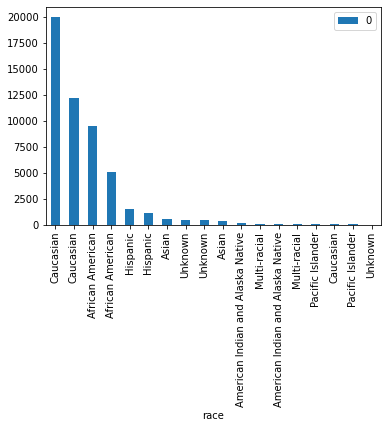

In [12]:
gender_race[["gender", "race", 0]].plot(x="race", kind="bar")
## no very colorful to peresent the issue. 

<ipython-input-13-199ea048b05e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(gender_race.index,rotation=90)


Text(0.5, 1.0, 'The number patients of in differnt Genders')

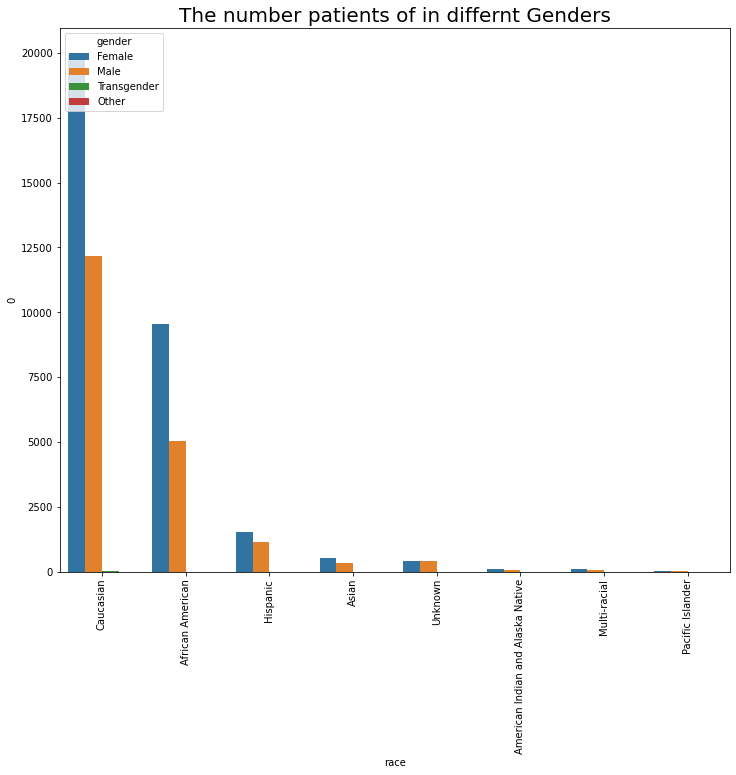

In [13]:
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.set_xticklabels(gender_race.index,rotation=90)
ax = sns.barplot(x="race", y=0 ,hue="gender", data=gender_race)
plt.title("The number patients of in differnt Genders", size=20)
## python barplot x rotation

# saving the picture: plt.savefig("The_number_patients_of_in differnt_Genders.png")

In [14]:
over_60.groupby(['gender','birth_year']).size() 
## some of years are very wired. 

gender       birth_year
Female       1900.0          85
             1918.0           2
             1919.0           4
             1920.0           1
             1921.0          12
                           ... 
Male         1959.0        1543
             1960.0         835
             1961.0         145
Other        1943.0           1
Transgender  1946.0          21
Length: 88, dtype: int64

In [15]:
gr_m = gender_race[gender_race['gender'] == 'Male']
gr_f = gender_race[gender_race['gender'] == 'Female']

# look the income with insurance and last time get checked

In [16]:
smile['income_level'] = smile['income_level'].str.replace(" ", "") 
## replace the black space in the "21 280"
smile['income_level'].value_counts()
## there is blank space on the 21280 income level. 

$0-$21280        42590
$21246-$24280     7332
$24281-$27315     2323
$28806-$32920     2016
$32921-$37035      645
$36366-$41560      236
$41561-$46755      206
$43926-$50200       58
$50201-$56475       55
$51486-$58840       26
$58841-$66195       22
$59046-$67480       18
$76121-$85635        8
$84761-$95355        4
$66606-$76120        4
$67481-$75915        3
$74166-$84760        2
Name: income_level, dtype: int64

In [17]:
smile.income_level.head()

0    $0-$21280
1    $0-$21280
2    $0-$21280
3    $0-$21280
4    $0-$21280
Name: income_level, dtype: object

In [18]:
insurance = smile.with_insurance.value_counts().reset_index()
insurance = insurance.rename(columns = {"with_insurance": "Yes_or_No"})
print(insurance)

  index  Yes_or_No
0    No      53131
1   Yes       1190


# Insurance holders perectage 

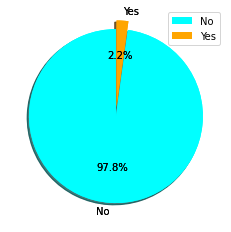

In [19]:
labels = insurance["index"]
sizes = insurance["Yes_or_No"]
colors = ("cyan","orange") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1) 
ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90) 
patches, texts, auto = ax1.pie(sizes, colors = colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.show()

## why only 2.2% holding insurance becasue of free med-care?

In [20]:
## low income level in the no insurance
no_insurance = smile[smile["with_insurance"] == 'No']
no_insurance.income_level.value_counts()

$0-$21280        40096
$21246-$24280     6570
$24281-$27315     2033
$28806-$32920     1705
$32921-$37035      566
$36366-$41560      189
$41561-$46755      158
$43926-$50200       50
$50201-$56475       41
$51486-$58840       22
$58841-$66195       18
$59046-$67480       15
$76121-$85635        7
$66606-$76120        4
$84761-$95355        3
$74166-$84760        2
$67481-$75915        2
Name: income_level, dtype: int64

In [21]:
no_insurance.last_time_visit.value_counts()

Less than 12 months    21354
More than 5 years      12260
1 to 2 years            9759
3 to 5 years            6779
Name: last_time_visit, dtype: int64

# The relationship between Income levelwith Insurance. 

In [22]:
yes_insurance = smile[smile["with_insurance"] == 'Yes']
yes_insurance.income_level.value_counts()

$0-$21280        655
$21246-$24280    194
$24281-$27315     78
$28806-$32920     56
$32921-$37035     21
$36366-$41560     21
$41561-$46755     20
$43926-$50200      4
$58841-$66195      2
$59046-$67480      2
$51486-$58840      1
$67481-$75915      1
$84761-$95355      1
$76121-$85635      1
Name: income_level, dtype: int64

In [23]:
yes_insurance.last_time_visit.value_counts()

Less than 12 months    510
More than 5 years      223
1 to 2 years           187
3 to 5 years           145
Name: last_time_visit, dtype: int64

# look the lowest income level with/without insurance for the last visit
$0-$21280 

In [32]:
no_low = smile.loc[(smile["with_insurance"] == 'No') & 
                   (smile["income_level"] == '$0-$21280')].last_time_visit.value_counts().reset_index()
no_low = no_low.rename(columns = {"last_time_visit": "no_last_time_visit"})
no_low

,index,no_last_time_visit
0,Less than 12 months,16246
1,More than 5 years,9471
2,1 to 2 years,7021
3,3 to 5 years,5157


In [33]:
yes_low = smile.loc[(smile["with_insurance"] == 'Yes') & 
                    (smile["income_level"] == '$0-$21280')].last_time_visit.value_counts().reset_index()
yes_low = yes_low.rename(columns = {"last_time_visit": "yes_last_time_visit"})
yes_low

,index,yes_last_time_visit
0,Less than 12 months,282
1,More than 5 years,142
2,1 to 2 years,110
3,3 to 5 years,92


# comparing with two of them for the last time visit

In [34]:
yorn = yes_low.merge(no_low, how = 'left', on = 'index')
##yorn.reset_index(inplace = True)
##yorn = yorn.dropna(columns )
yorn

,index,yes_last_time_visit,no_last_time_visit
0,Less than 12 months,282,16246
1,More than 5 years,142,9471
2,1 to 2 years,110,7021
3,3 to 5 years,92,5157


In [29]:
yorn.yes_last_time_visit.sum()

626

In [31]:
yorn.No_last_time_visit.sum()

37895

Text(0.5, 0, 'last_time_visit')

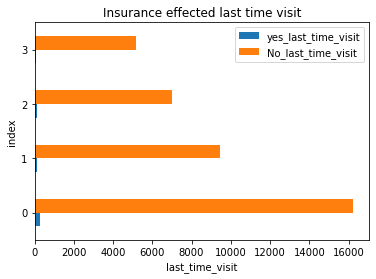

In [28]:
##yorn = yorn.rename(columns = {"yes_last_time_visit": "Visit last time with Insurance", "No_last_time_visit":"Visit last time without Insurance"})
yorn.plot(kind="barh")
plt.title("Insurance effected last time visit")
plt.ylabel("index")
plt.xlabel("last_time_visit")
## the number of people visit insanure is too small, not very good on the graph. 